<a href="https://colab.research.google.com/github/DenZhid/TelecommunicationSystemsLabs/blob/main/Lab4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнение 4.1**

На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др. На веб-странице [http://asoftmurmur.com/about/](http://asoftmurmur.com/about/) приведен перечень записей; большинство из них хранится на [http://freesound.org](http://freesound.org).

Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли их спектр мощности на белый, розовый или броуновский шум? Как спектр меняется во времени?

**Ход работы**

In [56]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Spectrum, Wave, Noise
from thinkdsp import decorate, read_wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if not os.path.exists('fireplace.wav'):
  !wget https://github.com/DenZhid/TelecommunicationSystemsLabs/raw/main/Lab4/resources/fireplace.wav

if not os.path.exists('sea.wav'):
  !wget https://github.com/DenZhid/TelecommunicationSystemsLabs/raw/main/Lab4/resources/sea.wav

if not os.path.exists('tibetan_bowls.wav'):
  !wget https://github.com/DenZhid/TelecommunicationSystemsLabs/raw/main/Lab4/resources/tibetan_bowls.wav

if not os.path.exists('bitcoin_prices_23_04_21-23_04_22.csv'):
  !wget https://github.com/DenZhid/TelecommunicationSystemsLabs/raw/main/Lab4/resources/bitcoin_prices_23_04_21-23_04_22.csv

Мною были выбраны три звука: звук моря, звук костра и тибетские чаши. Проанализируем их спектры. Примечание: для слишком долгих звуков будут использоваться их сегменты.

In [20]:
fireplace_segment = read_wave('fireplace.wav').segment(start=2.0, duration=1.0)
fireplace_segment.make_audio()

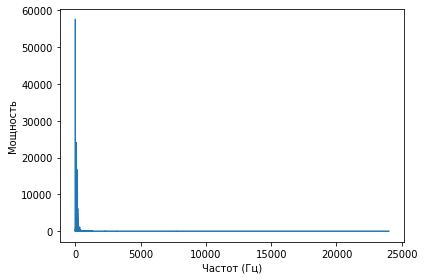

In [21]:
fireplace_spectrum = fireplace_segment.make_spectrum()
fireplace_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

По графику видно, что амплитуда падает с увеличением частоты, что означает, что это красный или розовый шум. Чтобы это узнать, необходимо распечатать спектр мощности в логарифмической шкале.

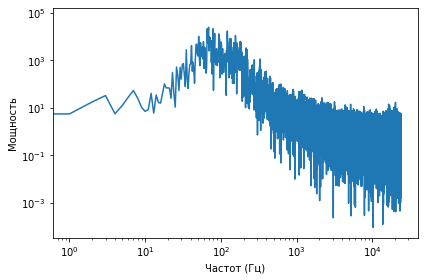

In [22]:
fireplace_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [40]:
fireplace_spectrum.estimate_slope().slope

-0.7988939343019013

Глядя на данный график сложно сказать, к какому шуму можно отнести данный шум, поскольку к частоте $10^2$ наблюдается рост мощности, а потом практически линейный спад. Для меня данный график наиболее напоминает график розвого шума. Рассмотрим изменение спектра со временем и возьмём следующий более поздний сегмент.

In [23]:
fireplace_segment2 = read_wave('fireplace.wav').segment(start=6.0, duration=1.0)
fireplace_segment2.make_audio()

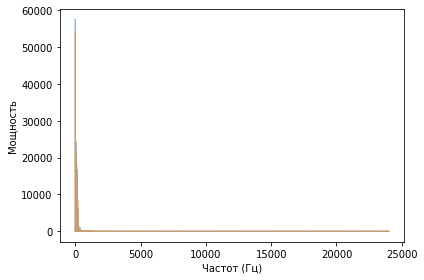

In [24]:
fireplace_spectrum2 = fireplace_segment2.make_spectrum()
fireplace_spectrum.plot_power(alpha=0.5)
fireplace_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

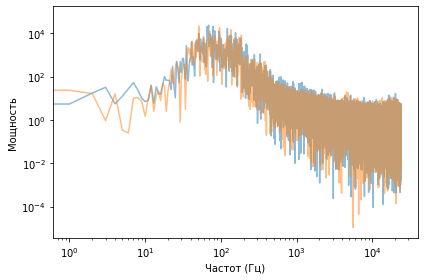

In [25]:
fireplace_spectrum.plot_power(alpha=0.5)
fireplace_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [41]:
fireplace_spectrum2.estimate_slope().slope

-0.7513172264449726

Из данного графика видно, что структура спектра не притерпивает сильных изменений. Теперь рассмотрим другие звуки.

In [26]:
sea_segment = read_wave('sea.wav').segment(start=2.0, duration=1.0)
sea_segment.make_audio()

In [27]:
sea_segment2 = read_wave('sea.wav').segment(start=6.0, duration=1.0)
sea_segment2.make_audio()

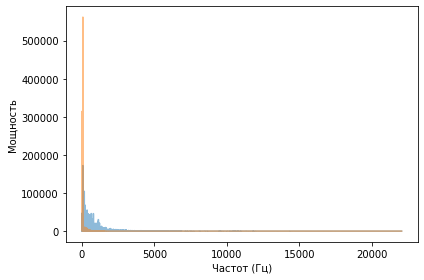

In [28]:
sea_spectrum = sea_segment.make_spectrum()
sea_spectrum2 = sea_segment2.make_spectrum()
sea_spectrum.plot_power(alpha=0.5)
sea_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность')

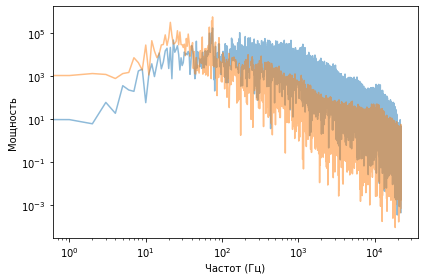

In [29]:
sea_spectrum.plot_power(alpha=0.5)
sea_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [43]:
sea_spectrum.estimate_slope().slope

-2.101639687951575

In [42]:
sea_spectrum2.estimate_slope().slope

-1.5160756308580368

Как и в предыдущем случае непросто сказать о точном принадлежности данного звука к какого-нибудь шуму, однако жёлтый график достаточно сильно похож на красный шум и при этом наблюдаем, что спектр во времени подвержен изменениям.

In [30]:
bowls_segment = read_wave('tibetan_bowls.wav').segment(start=2.0, duration=1.0)
bowls_segment.make_audio()

In [31]:
bowls_segment2 = read_wave('tibetan_bowls.wav').segment(start=6.0, duration=1.0)
bowls_segment2.make_audio()

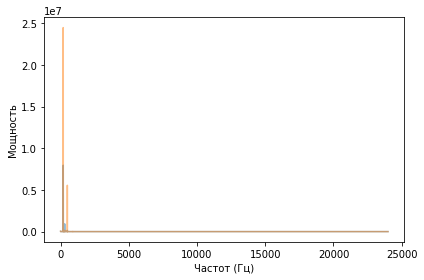

In [32]:
bowls_spectrum = bowls_segment.make_spectrum()
bowls_spectrum2 = bowls_segment2.make_spectrum()
bowls_spectrum.plot_power(alpha=0.5)
bowls_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частот (Гц)', ylabel='Мощность')

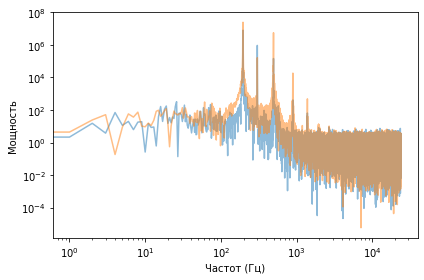

In [33]:
bowls_spectrum.plot_power(alpha=0.5)
bowls_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [44]:
bowls_spectrum.estimate_slope().slope

-0.4534539191627118

In [45]:
bowls_spectrum2.estimate_slope().slope

-0.7288328914602067

В данном случае получена картина с почти не изменяющимся спектром, что похоже на белый шум. Примечание: Уже позже я узнал, что можно высчитать уклон и сделать более точное предположение, однако большинство моих предположений подтвердились и после расчёт уклона, а те, которые опроверглись уже были мною подмечены в **Упражнении 4.2**.

# **Упражнение 4.2**

В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех частотах одинакова, а на коротком мощность на каждой частоте случайна.

Для оценки долговременной средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а затем найти среднее по сегментам.

Реализуйте метод Бартлетта и используйте его для оценки спектра мощности шумового сигнала. Подсказка: посмотрите на реализацию *make_spectrogram*.

**Ход работы**
Код метода Бартлетта представлен ниже

In [34]:
def bartlett_method(wave, seg_length=512, win_flag=True):
  spectrum = wave.make_spectrogram(seg_length, win_flag)
  segments = spectrum.spec_map.values()

  power_segments = []
  for segment in segments:
    power_segments.append(segment.power)
  
  hs = np.sqrt(sum(power_segments)/len(power_segments))
  fs = next(iter(segments)).fs

  spectrum = Spectrum(hs, fs, wave.framerate)
  return spectrum

Исследуем работу алгоритма на используемых выше сегментах.

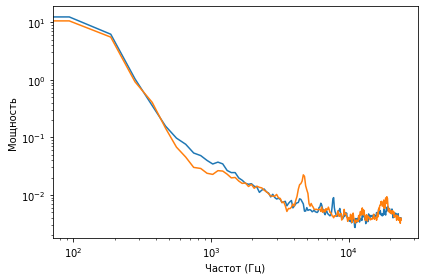

In [36]:
fireplace_res = bartlett_method(fireplace_segment)
fireplace_res2 = bartlett_method(fireplace_segment2)

sea_res = bartlett_method(sea_segment)
sea_res2 = bartlett_method(sea_segment2)

bowls_res = bartlett_method(bowls_segment)
bowls_res2 = bartlett_method(bowls_segment2)

fireplace_res.plot_power()
fireplace_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

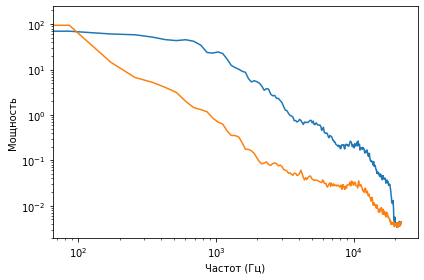

In [37]:
sea_res.plot_power()
sea_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

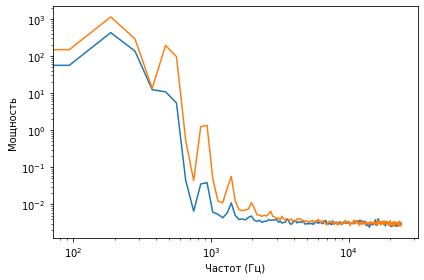

In [38]:
bowls_res.plot_power()
bowls_res2.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

С помощью данного метод мы можем видеть зависимость между частотами и мощностью более чётче. На основе новых графиков можно заметить, что предположение о том, что звук тибетских чаш - белый шум, неверно. Они имеют более сложную структуру. Остальные звки тоже имеют более сложную структуру, однако наше предположения в какой-то мере всё же правдивы.

# **Упражнение 4.3**

На веб-странице [http://www.coindesk.com/price](http://www.coindesk.com/price) можно скачать в ввиде CSV-файла исторические данные о ежедневной цене BitCoin. Откройте этот файл и вычислите спектр цен BitCoin как функцию времени. Похоже ли это на белый, розовый или броуновский шум?

**Ход работы**

Мною уже были скачаны данные о ежедневной цене биткоин за последний год (использовался другой сайт, поскольку на предоставленном нет возможности скачать CSV-файл). Проанализируем его.

In [49]:
data = pd.read_csv('bitcoin_prices_23_04_21-23_04_22.csv', parse_dates=[0])
data

,Timestamp,market-price
0,2021-04-23,51731.71
1,2021-04-24,51153.13
2,2021-04-25,50110.53
3,2021-04-26,49075.58
4,2021-04-27,54056.64
...,...,...
361,2022-04-19,40805.72
362,2022-04-20,41507.30
363,2022-04-21,41375.79
364,2022-04-22,40514.01


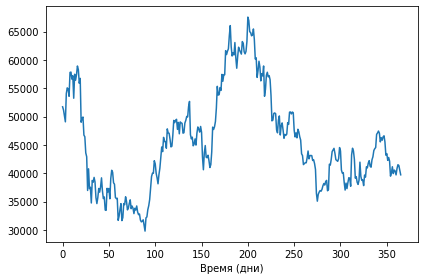

In [53]:
btc_wave = Wave(data['market-price'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время (дни)')

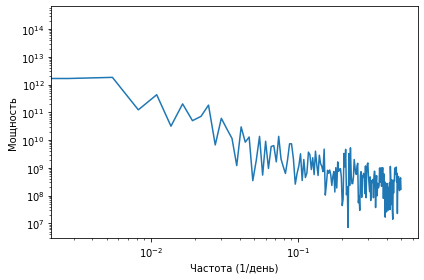

In [54]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Частота (1/день)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [68]:
btc_spectrum.estimate_slope().slope

-1.6980726865241098

Имеем наклон ~-1.7. Это близко к красному шуму, однако всё же правильнее будет отнести имеющиеся данные к разновиднсоти розового шума.

# **Упражнение 4.4**

Счетчик Гейгера - прибор для обнаружения радиации. Когда ионизирующи частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.

Напишите класс, называемый *UncorrelatedPoissonNoise*, наследующий *thinkdsp._Noise* и предоставляющий *evaluate*. Следует использовать *Np.random.poisson* для генерации случайный величин из распределения Пуассона. Параметр этой функции *lam* - это среднее число частиц за время каждого интервала. Можно использовать атрибут *amp* для определения *lam*. Например, при чатоте кадров 10 кГц и *amp* 0,001 получится около 10 "щелчков" в секунду.

Сгенерируйте пару секунд UP и прослушайте. Для малых значений *amp*, например 0,001, звук будет как у счетчика Гейгера. При больших значениях он будет похож на белый шум. Вычислите и напечатайте спектр мощности и посмотрите, так ли это.

**Ход работы**

Код класса представлен ниже

In [58]:
class UncorrelatedPoissonNoise(Noise):

  def evaluate(self, ts):
    ys = np.random.poisson(self.amp, len(ts))
    return ys

Как и предлагается в задании сгенерируем данный шум для малых и больших значениях *amp* и посмотрим сопоставимы ли звуки с ожидаемыми.

In [62]:
like_geiger_signal = UncorrelatedPoissonNoise(amp=0.001)
like_geiger_wave = like_geiger_signal.make_wave(duration=2.0, framerate=10000)
like_white_noise_signal = UncorrelatedPoissonNoise(amp=1)
like_white_noise_wave = like_white_noise_signal.make_wave(duration=2.0, framerate=10000)

like_geiger_wave.make_audio()

In [60]:
like_white_noise_wave.make_audio()

Если прослушать звуки, то, действительно, в первом случае услышим что-то похоже на трещание счётчика Гейгера, а во втором - белый шум. Сравним графики и спектры сигналов.

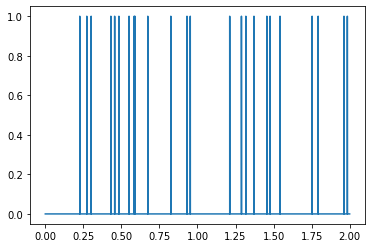

In [63]:
like_geiger_wave.plot()

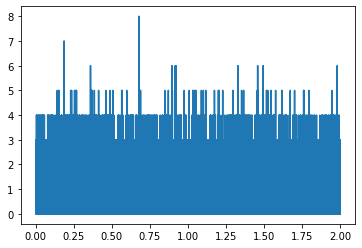

In [64]:
like_white_noise_wave.plot()

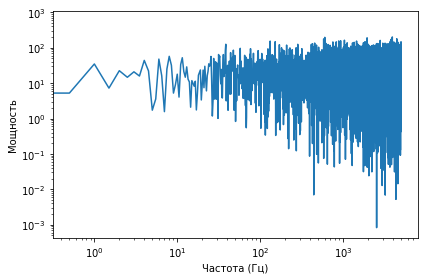

In [65]:
like_geiger_spectrum = like_geiger_wave.make_spectrum()
like_geiger_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [67]:
like_geiger_spectrum.estimate_slope().slope

-0.0058912929622937284

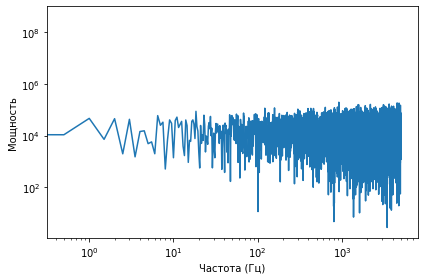

In [69]:
like_white_noise_spectrum = like_white_noise_wave.make_spectrum()
like_white_noise_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [70]:
like_white_noise_spectrum.estimate_slope().slope

-0.0004551191596456196

Как мы видим из полученных данных оба сигнала имеют уклон ~0, в связи с чем их можно считать белым шумом.

# **Упражнение 4.5**

В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существет более эффективные варианты, например алгоритм Voss-McCartney. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношения между мощностью и частотой соответсвующие.